In [32]:
import numpy as np
import pandas as pd

In [33]:
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week",
    "native-country", "income"
]


In [34]:
train_path = r"C:\iit_mandi_projects\DL\Assignment1\datasets\adult\adult.data"

train_df = pd.read_csv(
    train_path,
    header=None,
    names=columns,
    sep=",",
    skipinitialspace=True
)
print(train_df['age'])

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64


In [35]:
test_path = r"C:\iit_mandi_projects\DL\Assignment1\datasets\adult\adult.test"


test_df = pd.read_csv(
    test_path,
    header=None,
    names=columns,
    sep=",",
    skipinitialspace=True,
    skiprows=1
)
print(test_df['age'])

0        25
1        38
2        28
3        44
4        18
         ..
16276    39
16277    64
16278    38
16279    44
16280    35
Name: age, Length: 16281, dtype: int64


In [36]:
train_df["income"] = train_df["income"].str.strip()
test_df["income"] = test_df["income"].str.strip().str.replace(".", "", regex=False)


In [37]:
print(test_df['income'])
print(train_df['income'])

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
16276    <=50K
16277    <=50K
16278    <=50K
16279    <=50K
16280     >50K
Name: income, Length: 16281, dtype: object
0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income, Length: 32561, dtype: object


In [38]:
train_df = train_df.replace("?", np.nan).dropna()
test_df = test_df.replace("?", np.nan).dropna()


In [39]:
for df in [train_df, test_df]:
    df["income"] = (df["income"] == ">50K").astype(int)

In [40]:
print(test_df['income'])
print(train_df['income'])

0        0
1        0
2        1
3        1
5        0
        ..
16275    0
16276    0
16278    0
16279    0
16280    1
Name: income, Length: 15060, dtype: int32
0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 30162, dtype: int32


In [41]:
y_train = train_df["income"].values
X_train_df = train_df.drop("income", axis=1)

y_test = test_df["income"].values
X_test_df = test_df.drop("income", axis=1)


In [42]:
X_train_df = pd.get_dummies(X_train_df)
X_test_df = pd.get_dummies(X_test_df)

X_train_df, X_test_df = X_train_df.align(
    X_test_df, join="left", axis=1, fill_value=0
)


In [43]:
X_train = X_train_df.values.T
X_test = X_test_df.values.T

y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)


In [44]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

y_train = y_train.astype(float)
y_test = y_test.astype(float)


In [45]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))


In [46]:
np.random.seed(42)

input_size = X_train.shape[0]
hidden1 = 64
hidden2 = 32
output_size = 1

W1 = np.random.randn(hidden1, input_size) * np.sqrt(2 / input_size)
b1 = np.zeros((hidden1, 1))

W2 = np.random.randn(hidden2, hidden1) * np.sqrt(2 / hidden1)
b2 = np.zeros((hidden2, 1))

W3 = np.random.randn(output_size, hidden2) * np.sqrt(2 / hidden2)
b3 = np.zeros((output_size, 1))


In [47]:
learning_rate = 0.01
epochs = 30
batch_size = 64

num_samples = X_train.shape[1]


In [71]:
iteration = 0
train_loss = []
for epoch in range(epochs):

    for i in range(0, num_samples, batch_size):
        iteration += 1
        X_batch = X_train[:, i:i+batch_size]
        y_batch = y_train[:, i:i+batch_size]
        m = X_batch.shape[1]

        Z1 = np.dot(W1, X_batch) + b1
        A1 = relu(Z1)

        Z2 = np.dot(W2, A1) + b2
        A2 = relu(Z2)

        Z3 = np.dot(W3, A2) + b3
        y_hat = sigmoid(Z3)

        loss = -np.mean(
            y_batch * np.log(y_hat + 1e-8) +
            (1 - y_batch) * np.log(1 - y_hat + 1e-8)
        )
        
        dZ3 = y_hat - y_batch
        dW3 = np.dot(dZ3, A2.T) / m
        db3 = np.sum(dZ3, axis=1, keepdims=True) / m

        dA2 = np.dot(W3.T, dZ3)
        dZ2 = dA2 * relu_derivative(Z2)
        dW2 = np.dot(dZ2, A1.T) / m
        db2 = np.sum(dZ2, axis=1, keepdims=True) / m

        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = np.dot(dZ1, X_batch.T) / m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m

        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3

        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

        if iteration % 100 == 0:
            print(f"Epoch {epoch+1}, Loss: {loss:.4f}")
            train_loss.append(loss)


Epoch 1, Loss: 0.5278
Epoch 1, Loss: 0.5277
Epoch 1, Loss: 0.4756
Epoch 1, Loss: 0.5623
Epoch 2, Loss: 0.5451
Epoch 2, Loss: 0.5969
Epoch 2, Loss: 0.5796
Epoch 2, Loss: 0.5450
Epoch 2, Loss: 0.5278
Epoch 3, Loss: 0.6266
Epoch 3, Loss: 0.6144
Epoch 3, Loss: 0.5579
Epoch 3, Loss: 0.6142
Epoch 3, Loss: 0.7005
Epoch 4, Loss: 0.5451
Epoch 4, Loss: 0.6143
Epoch 4, Loss: 0.5623
Epoch 4, Loss: 0.5796
Epoch 5, Loss: 0.5623
Epoch 5, Loss: 0.4933
Epoch 5, Loss: 0.5623
Epoch 5, Loss: 0.6144
Epoch 5, Loss: 0.4413
Epoch 6, Loss: 0.5967
Epoch 6, Loss: 0.5277
Epoch 6, Loss: 0.4236
Epoch 6, Loss: 0.5797
Epoch 6, Loss: 0.5450
Epoch 7, Loss: 0.4935
Epoch 7, Loss: 0.5970
Epoch 7, Loss: 0.6144
Epoch 7, Loss: 0.4757
Epoch 7, Loss: 0.5623
Epoch 8, Loss: 0.6140
Epoch 8, Loss: 0.5796
Epoch 8, Loss: 0.5797
Epoch 8, Loss: 0.4932
Epoch 9, Loss: 0.7002
Epoch 9, Loss: 0.5104
Epoch 9, Loss: 0.6143
Epoch 9, Loss: 0.4884
Epoch 9, Loss: 0.5969
Epoch 10, Loss: 0.5280
Epoch 10, Loss: 0.5971
Epoch 10, Loss: 0.5450
Epoch 1

In [69]:

Z1 = np.dot(W1, X_test) + b1
A1 = relu(Z1)

Z2 = np.dot(W2, A1) + b2
A2 = relu(Z2)

Z3 = np.dot(W3, A2) + b3
y_pred = sigmoid(Z3)

y_pred_labels = (y_pred > 0.5).astype(int)

accuracy = np.mean(y_pred_labels == y_test)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7556440903054449


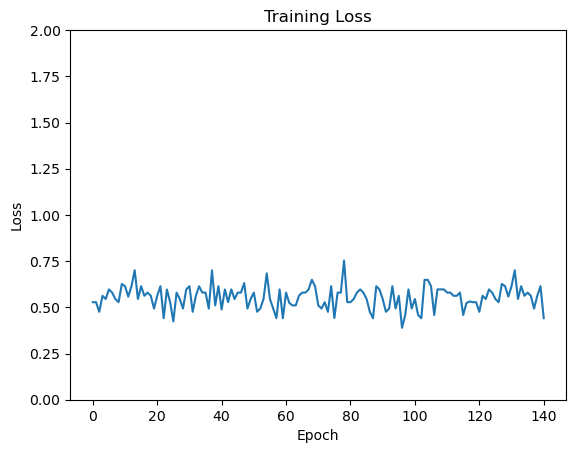

In [73]:
import matplotlib.pyplot as plt

plt.plot(train_loss)

plt.xlabel("Epoch")
plt.ylabel("Loss")
#plt.legend(["Train Loss", "Validation Loss"])
plt.title("Training Loss")
plt.ylim(0, 2.0) 
plt.show()

In [77]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
train_df, val_df = train_test_split(
    train_df, test_size=0.2, random_state=42, stratify=train_df["income"]
)

y_train = train_df["income"].values
y_val = val_df["income"].values
y_test = test_df["income"].values

X_train_df = train_df.drop("income", axis=1)
X_val_df = val_df.drop("income", axis=1)
X_test_df = test_df.drop("income", axis=1)


X_train_df = pd.get_dummies(X_train_df)
X_val_df = pd.get_dummies(X_val_df)
X_test_df = pd.get_dummies(X_test_df)

X_train_df, X_val_df = X_train_df.align(X_val_df, join="left", axis=1, fill_value=0)
X_train_df, X_test_df = X_train_df.align(X_test_df, join="left", axis=1, fill_value=0)


X_train = X_train_df.values.T.astype(float)
X_val = X_val_df.values.T.astype(float)
X_test = X_test_df.values.T.astype(float)

y_train = y_train.reshape(1, -1).astype(float)
y_val = y_val.reshape(1, -1).astype(float)
y_test = y_test.reshape(1, -1).astype(float)

In [ ]:

pos = np.sum(y_train == 1)
neg = np.sum(y_train == 0)
w1 = neg / (pos + neg)
w0 = pos / (pos + neg)


def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

def sigmoid(Z):
    Z = np.clip(Z, -500, 500)
    return 1 / (1 + np.exp(-Z))

np.random.seed(42)

input_size = X_train.shape[0]
hidden1 = 64
hidden2 = 32
output_size = 1

W1 = np.random.randn(hidden1, input_size) * np.sqrt(2 / input_size)
b1 = np.zeros((hidden1, 1))

W2 = np.random.randn(hidden2, hidden1) * np.sqrt(2 / hidden1)
b2 = np.zeros((hidden2, 1))

W3 = np.random.randn(output_size, hidden2) * np.sqrt(2 / hidden2)
b3 = np.zeros((output_size, 1))

learning_rate = 0.001
epochs = 30
batch_size = 64

train_losses = []
val_losses = []

Epoch 1/30 | Train Loss: 0.2269 | Val Loss: 0.2592
Epoch 1/30 | Train Loss: 0.2704 | Val Loss: 0.2592
Epoch 1/30 | Train Loss: 0.2432 | Val Loss: 0.2592
Epoch 2/30 | Train Loss: 0.2541 | Val Loss: 0.2592
Epoch 2/30 | Train Loss: 0.2650 | Val Loss: 0.2592
Epoch 2/30 | Train Loss: 0.2650 | Val Loss: 0.2592
Epoch 2/30 | Train Loss: 0.2976 | Val Loss: 0.2592
Epoch 3/30 | Train Loss: 0.2650 | Val Loss: 0.2592
Epoch 3/30 | Train Loss: 0.2541 | Val Loss: 0.2592
Epoch 3/30 | Train Loss: 0.2813 | Val Loss: 0.2592
Epoch 3/30 | Train Loss: 0.2487 | Val Loss: 0.2592
Epoch 4/30 | Train Loss: 0.2596 | Val Loss: 0.2592
Epoch 4/30 | Train Loss: 0.2324 | Val Loss: 0.2592
Epoch 4/30 | Train Loss: 0.2541 | Val Loss: 0.2592
Epoch 4/30 | Train Loss: 0.2541 | Val Loss: 0.2592
Epoch 5/30 | Train Loss: 0.2596 | Val Loss: 0.2592
Epoch 5/30 | Train Loss: 0.2323 | Val Loss: 0.2592
Epoch 5/30 | Train Loss: 0.2813 | Val Loss: 0.2592
Epoch 6/30 | Train Loss: 0.2704 | Val Loss: 0.2592
Epoch 6/30 | Train Loss: 0.2596

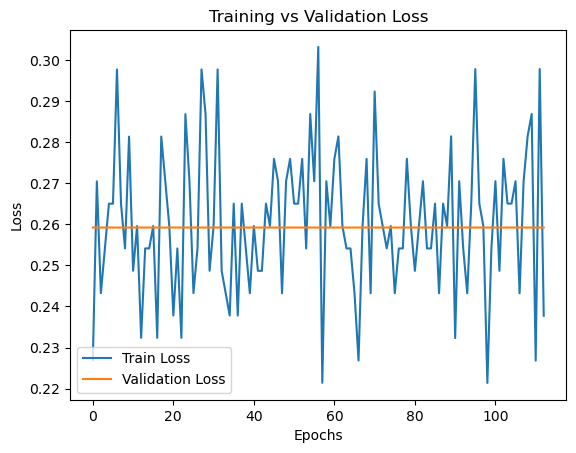

Test Accuracy: 0.7543160690571049


In [ ]:
num_samples = X_train.shape[1]
it = 0
for epoch in range(epochs):

    for i in range(0, num_samples, batch_size):
        it += 1
        X_batch = X_train[:, i:i+batch_size]
        y_batch = y_train[:, i:i+batch_size]
        m = X_batch.shape[1]

        Z1 = np.dot(W1, X_batch) + b1
        A1 = relu(Z1)

        Z2 = np.dot(W2, A1) + b2
        A2 = relu(Z2)

        Z3 = np.dot(W3, A2) + b3
        y_hat = sigmoid(Z3)

        loss = -np.mean(
            w1*y_batch * np.log(y_hat + 1e-8) +
            w0*(1 - y_batch) * np.log(1 - y_hat + 1e-8)
        )
        dZ3 = (w1 * y_batch + w0 * (1 - y_batch)) * (y_hat - y_batch)

        dW3 = np.dot(dZ3, A2.T) / m
        db3 = np.sum(dZ3, axis=1, keepdims=True) / m

        dA2 = np.dot(W3.T, dZ3)
        dZ2 = dA2 * relu_derivative(Z2)
        dW2 = np.dot(dZ2, A1.T) / m
        db2 = np.sum(dZ2, axis=1, keepdims=True) / m

        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * relu_derivative(Z1)
        dW1 = np.dot(dZ1, X_batch.T) / m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m

        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3

        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

        if it % 100 == 0:
          

          Z1v = W1 @ X_val + b1
          A1v = relu(Z1v)
          Z2v = W2 @ A1v + b2
          A2v = relu(Z2v)
          Z3v = W3 @ A2v + b3
          y_val_hat = sigmoid(Z3v)

          val_loss = -np.mean(
              w1 * y_val * np.log(y_val_hat + 1e-8) +
              w0 * (1 - y_val) * np.log(1 - y_val_hat + 1e-8)
          )

          train_losses.append(loss)
          val_losses.append(val_loss)

          
          print(f"Epoch {epoch+1}/{epochs} | Train Loss: {loss:.4f} | Val Loss: {val_loss:.4f}")


plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

Z1 = W1 @ X_test + b1
A1 = relu(Z1)
Z2 = W2 @ A1 + b2
A2 = relu(Z2)
Z3 = W3 @ A2 + b3
y_pred = sigmoid(Z3)

y_pred_labels = (y_pred > 0.5).astype(int)
accuracy = np.mean(y_pred_labels == y_test)
print("Test Accuracy:", accuracy)
